# Data Processing

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

In [15]:
pwd

'/var/autofs/misc/home/ahmedt/Ahmed/Applied ML'

In [87]:
class Dataset():
    def __init__(self, data_dir):

        f = open(os.path.join(data_dir, "ratings.csv"), 'r')
        lines = f.readlines()[1:]

        self.ratings_data = []
        for line in lines:
            user, movie, rating, _ = line.split(',')
            user, movie, rating = int(user), int(movie), float(rating)
            self.ratings_data.append((user, movie, rating))


        self.ratings_data = np.array(self.ratings_data)
        # np.random.shuffle(self.ratings_data)

        # self.ratigns_data = self.ratings_data[:10 ** 7]


        self.idx_to_user = []
        self.idx_to_movie = []
        self.user_to_idx = {}
        self.movie_to_idx = {}

        self.train_users_ratings = []
        self.train_users_indices = []
        self.test_users_ratings = []
        self.test_users_indices = []

        self.train_movies_ratings = []
        self.train_movies_indices = []
        self.test_movies_ratings = []
        self.test_movies_indices = []

        i = 0
        for user, movie, rating in self.ratings_data:
            # i += 1
            # if i % 1000000 == 0:
            #     print('i =', i)
            if user not in self.user_to_idx:
                # Creating a new mapping for the new user
                self.idx_to_user.append(user)
                self.train_users_indices.append([])
                self.test_users_indices.append([])
                self.train_users_ratings.append([])
                self.test_users_ratings.append([])
                
                self.user_to_idx[user] = len(self.idx_to_user) - 1
            if movie not in self.movie_to_idx:
                # Creating a new mapping for the new movie
                self.idx_to_movie.append(movie)
                self.train_movies_indices.append([])
                self.test_movies_indices.append([])
                self.train_movies_ratings.append([])
                self.test_movies_ratings.append([])
                self.movie_to_idx[movie] = len(self.idx_to_movie) - 1

            userIdx = self.user_to_idx[user]
            movieIdx = self.movie_to_idx[movie]
            if np.random.rand() > 0.1:
                self.train_users_indices[userIdx].append(movieIdx)
                self.train_movies_indices[movieIdx].append(userIdx)
                self.train_users_ratings[userIdx].append(rating)
                self.train_movies_ratings[movieIdx].append(rating)
            else:
                self.test_users_indices[userIdx].append(movieIdx)
                self.test_movies_indices[movieIdx].append(userIdx)
                self.test_users_ratings[userIdx].append(rating)
                self.test_movies_ratings[movieIdx].append(rating)


        # Converting the 8 lists to numpy arrays
        for user in range(len(self.train_users_ratings)):
            self.train_users_ratings[user] = np.array(self.train_users_ratings[user])
            self.train_users_indices[user] = np.array(self.train_users_indices[user])
            self.test_users_ratings[user] = np.array(self.test_users_ratings[user])
            self.test_users_indices[user] = np.array(self.test_users_indices[user])

        for movie in range(len(self.train_movies_ratings)):
            self.train_movies_ratings[movie] = np.array(self.train_movies_ratings[movie])
            self.train_movies_indices[movie] = np.array(self.train_movies_indices[movie])
            self.test_movies_ratings[movie] = np.array(self.test_movies_ratings[movie])
            self.test_movies_indices[movie] = np.array(self.test_movies_indices[movie])


        
        # Sorting the 8 numpy arrays
        for user in range(len(self.train_users_ratings)):
            self.train_users_ratings[user] = self.train_users_ratings[user][np.argsort(self.train_users_indices[user])]
            self.train_users_indices[user].sort()
            self.test_users_ratings[user] = self.test_users_ratings[user][np.argsort(self.test_users_indices[user])]
            self.test_users_indices[user].sort()


        for movie in range(len(self.train_movies_ratings)):
            self.train_movies_ratings[movie] = self.train_movies_ratings[movie][np.argsort(self.train_movies_indices[movie])]
            self.train_movies_indices[movie].sort()
            self.test_movies_ratings[movie] = self.test_movies_ratings[movie][np.argsort(self.test_movies_indices[movie])]
            self.test_movies_indices[movie].sort()



        self.movie_idx_to_name = [""] * len(self.train_movies_indices)
        self.movie_name_to_idx = {}
        f = open(os.path.join(data_dir, "movies.csv"), 'r')
        lines = f.readlines()[1:]
        # self.ratings_data = []
        for line in lines:
            # print('line =', line)
            first = line.find(',')
            last = line.rfind(',')
            movie_id, movie_name = line[:first], line[first+1:last]

            movie_id = int(movie_id)
            if movie_id in self.movie_to_idx:
                movie_idx = self.movie_to_idx[movie_id]
                self.movie_idx_to_name[movie_idx] = movie_name
                self.movie_name_to_idx[movie_name] = movie_idx


    def get_name_movie(self, movie_idx):
        return self.movie_idx_to_name[movie_idx]

    def get_idx_movie(self, movie_name):
        return self.movie_name_to_idx[movie_name]




    def get_ratings_by_user(self, user, train=True):
        if train:
            return self.train_users_ratings[user]
        return self.test_users_ratings[user]

    def get_indices_by_user(self, user, train=True):
        if train:
            return self.train_users_indices[user]
        return self.test_users_indices[user]



    def plot_power_law_movies(self):
        movie_ids = [movie for user, movie, rating in self.ratings_data]
        count = Counter(movie_ids)
        
        freq_of_degree = Counter(count.values())
        x, y = freq_of_degree.keys(), freq_of_degree.values()
        x, y = list(x), list(y)
        x = np.log(np.array(x))
        y = np.log(np.array(y))
        
        plt.scatter(x, y)
        # plt.title("Movies Power Law Distribution")
        plt.xlabel("Number of users rated the movie (log-scale)")
        plt.ylabel("Frequences (log-scale)")
        # plt.savefig('movies_power_law.svg')
        plt.show()



    def plot_power_law_users(self):
        user_ids = [user for user, movie, rating in self.ratings_data]
        count = Counter(user_ids)
        
        freq_of_degree = Counter(count.values())
        x, y = freq_of_degree.keys(), freq_of_degree.values()
        x, y = list(x), list(y)
        x = np.log(np.array(x))
        y = np.log(np.array(y))
        
        plt.scatter(x, y)
        # plt.title("Users Power Law Distribution")
        plt.xlabel("Number of movies rated by the user(log-scale)")
        plt.ylabel("Frequences (log-scale)")
        # plt.savefig('users_power_law.svg')
        plt.show()


    def plot_ratings_dist(self):
        ratings_list = [rating for user, movie, rating in my_ds.ratings_data]
        count = Counter(ratings_list)
        
        # freq_of_degree = Counter(count.values())
        x = sorted(count)
        y = [count[i] for i in x]
        # x, y = list(x), list(y)
        x = np.array(x)
        y = np.array(y)
        
        plt.plot(x, y)
        # plt.title("Ratings Distribution")
        plt.xlabel("Ratings")
        plt.ylabel("Frequences")
        # plt.savefig('ratings_dist.svg')
        plt.show()

In [88]:
# my_ds = Dataset('ml-1m/ratings.dat')
# my_ds = Dataset('ml-25m')
my_ds = Dataset('ml-32m')

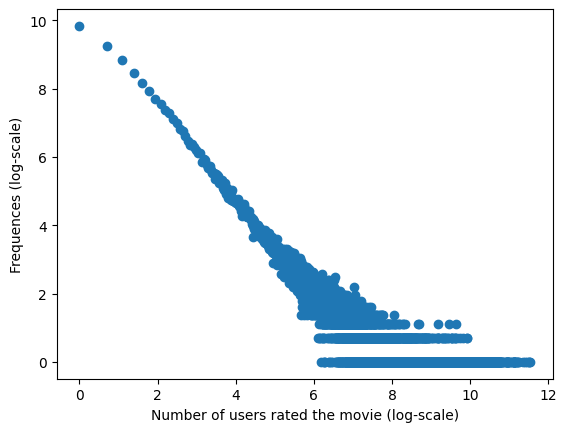

In [11]:
my_ds.plot_power_law_movies()

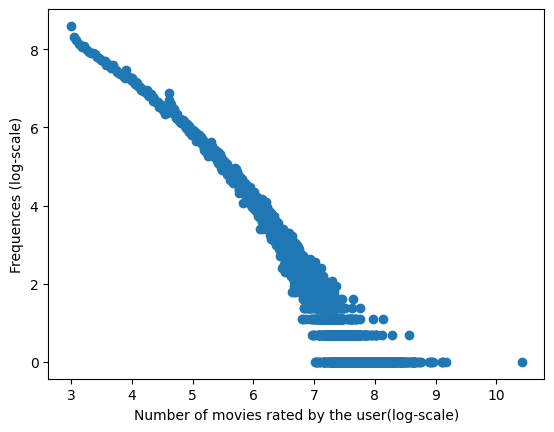

In [12]:
my_ds.plot_power_law_users()

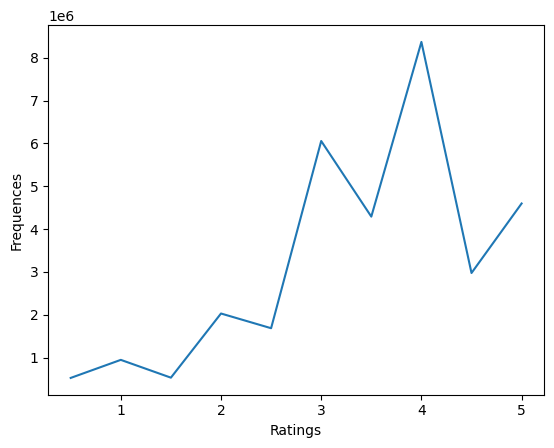

In [13]:
my_ds.plot_ratings_dist()

In [6]:
print(len(my_ds.train_users_ratings))
print(len(my_ds.train_movies_ratings))

200948
84432


# Biases Only

In [34]:
def loss(ds, user_bias, movie_bias, lamda, gamma, train=True):
  cost = 0
  for user in range(len(ds.train_users_ratings)):
  
    indices = ds.get_indices_by_user(user, train)
    ratings = ds.get_ratings_by_user(user, train)
    if len(ratings) == 0:
        continue
    cost += np.sum((ratings - movie_bias[indices] - user_bias[user]) ** 2)
  
  cost *= lamda / 2

  cost += gamma / 2 * (np.dot(user_bias, user_bias) + np.dot(movie_bias, movie_bias))


  return cost


In [35]:
def rmse(ds, user_bias, movie_bias, train=True):
  cost = 0
  count = 0
  for user in range(len(ds.train_users_ratings)):

    indices = ds.get_indices_by_user(user, train)
    ratings = ds.get_ratings_by_user(user, train)
    if len(ratings) == 0:
        continue
      
    cost += np.sum((ratings - movie_bias[indices] - user_bias[user]) ** 2)
    count += len(ratings)
    

  cost = np.sqrt(cost / count)

  return cost


In [39]:
def als_loop(ds, user_bias, movie_bias, lamda, gamma):
  num_users = len(user_bias)
  num_movies = len(movie_bias)

  # Updating users biases
  for user in range(num_users):

    indices = ds.train_users_indices[user]
    ratings = ds.train_users_ratings[user]

    if indices.size == 0:
        continue
        
    user_bias[user] = (ratings.sum() - movie_bias[indices].sum()) * lamda / (lamda * len(indices) + gamma)


  # Updating movies biases
  for movie in range(num_movies):

    indices = ds.train_movies_indices[movie]
    ratings = ds.train_movies_ratings[movie]

    if indices.size == 0:
        continue
        
    # Updating Movie bias
    movie_bias[movie] = (ratings.sum() - user_bias[indices].sum()) * lamda / (lamda * len(indices) + gamma)



  return user_bias, movie_bias

In [44]:
import time
def als(ds, lamda=0.1, gamma=0.1, iters=20):

  num_users = len(ds.train_users_ratings)
  num_movies = len(ds.train_movies_ratings)

  user_bias = np.zeros(num_users)
  movie_bias = np.zeros(num_movies)

  losses = []
  test_losses = []
  rmses = []
  test_rmses = []
  losses.append(loss(ds, user_bias, movie_bias, lamda, gamma, train=True))
  test_losses.append(loss(ds, user_bias, movie_bias, lamda, gamma, train=False))
  rmses.append(rmse(ds, user_bias, movie_bias, train=True))
  test_rmses.append(rmse(ds, user_bias, movie_bias, train=False))
  duration = 0
  for i in range(iters):
    tic = time.time()
    user_bias, movie_bias = als_loop(ds, user_bias, movie_bias, lamda, gamma)
    losses.append(loss(ds, user_bias, movie_bias, lamda, gamma, train=True))
    test_losses.append(loss(ds, user_bias, movie_bias, lamda, gamma, train=False))
    rmses.append(rmse(ds, user_bias, movie_bias, train=True))
    test_rmses.append(rmse(ds, user_bias, movie_bias, train=False))
    toc = time.time()
    duration += (toc - tic)

    print('iter =', i+1, '\t', 'Commulative Time =', round(duration, 2), 'secs', '\tloss =', round(losses[-1], 1), '\tTest Loss =', round(test_losses[-1], 1), '\tTrain RMSE =', round(rmses[-1], 4), '\tTest RMSE =', round(test_rmses[-1], 4))


  return user_bias, movie_bias, losses, test_losses, rmses, test_rmses

In [45]:
lamda, gamma = 0.1, 0.1
iters = 20
user_bias, movie_bias, losses, test_losses, rmses, test_rmses = als(my_ds, lamda, gamma, iters)

iter = 1 	 Commulative Time = 2.97 secs 	loss = 1203607.9 	Test Loss = 256662.8 	Train RMSE = 0.8611 	Test RMSE = 0.8689
iter = 2 	 Commulative Time = 5.99 secs 	loss = 1165270.5 	Test Loss = 247628.8 	Train RMSE = 0.8477 	Test RMSE = 0.8556
iter = 3 	 Commulative Time = 9.0 secs 	loss = 1161725.8 	Test Loss = 245130.0 	Train RMSE = 0.8472 	Test RMSE = 0.8551
iter = 4 	 Commulative Time = 12.04 secs 	loss = 1159812.9 	Test Loss = 243265.3 	Train RMSE = 0.8472 	Test RMSE = 0.8551
iter = 5 	 Commulative Time = 15.07 secs 	loss = 1158026.8 	Test Loss = 241511.0 	Train RMSE = 0.8472 	Test RMSE = 0.8551
iter = 6 	 Commulative Time = 18.11 secs 	loss = 1156281.0 	Test Loss = 239795.9 	Train RMSE = 0.8472 	Test RMSE = 0.8551
iter = 7 	 Commulative Time = 21.16 secs 	loss = 1154567.6 	Test Loss = 238109.7 	Train RMSE = 0.8472 	Test RMSE = 0.8551
iter = 8 	 Commulative Time = 24.2 secs 	loss = 1152885.3 	Test Loss = 236451.8 	Train RMSE = 0.8471 	Test RMSE = 0.855
iter = 9 	 Commulative Time = 

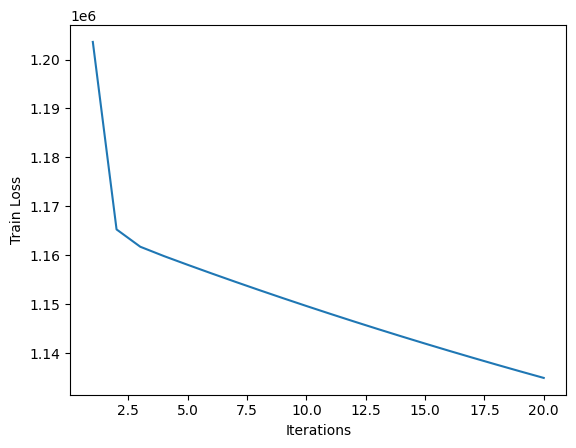

In [51]:
import matplotlib.pyplot as plt
# plt.plot(range(0, len(losses)), losses[:])
plt.plot(range(1, len(losses)), losses[1:])
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
# plt.title('Train Loss vs Iterations')
plt.savefig('train_loss_biases.svg')
plt.show()

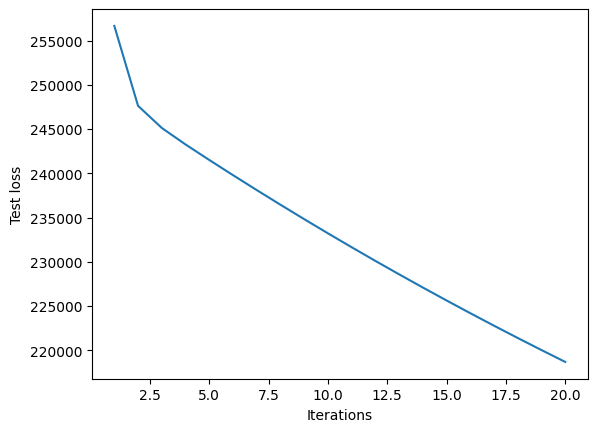

In [52]:
import matplotlib.pyplot as plt
# plt.plot(range(len(test_losses)), test_losses)
plt.plot(range(1, len(test_losses)), test_losses[1:])
plt.xlabel('Iterations')
plt.ylabel('Test loss')
# plt.title('Test Loss vs Iterations')
plt.savefig('test_loss_biases.svg')
plt.show()

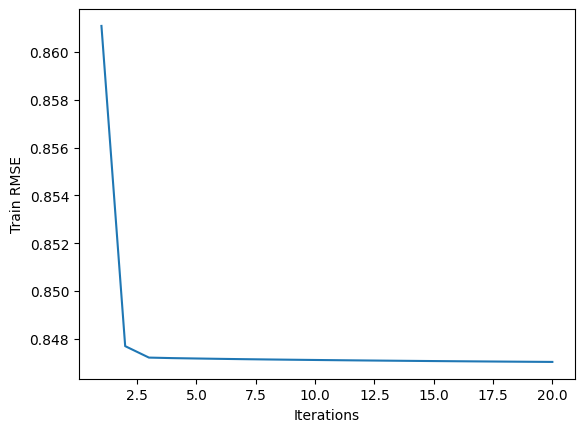

In [53]:
import matplotlib.pyplot as plt
# plt.plot(range(len(rmses)), rmses)
plt.plot(range(1, len(rmses)), rmses[1:])
plt.xlabel('Iterations')
plt.ylabel('Train RMSE')
# plt.title('Train RMSE vs Iterations')
plt.savefig('train_rmse_biases.svg')
plt.show()

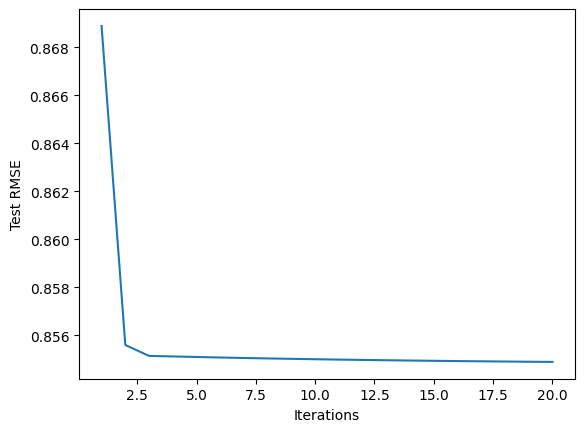

In [54]:
import matplotlib.pyplot as plt
# plt.plot(range(len(test_rmses)), test_rmses)
plt.plot(range(1, len(test_rmses)), test_rmses[1:])

plt.xlabel('Iterations')
plt.ylabel('Test RMSE')
# plt.title('Test RMSE vs Iterations')
plt.savefig('test_rmse_biases.svg')
plt.show()

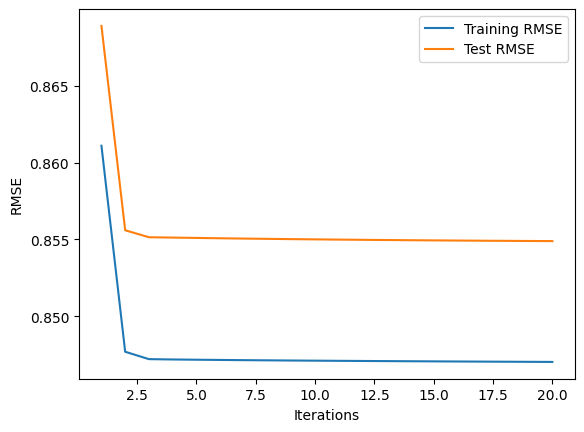

In [55]:
import matplotlib.pyplot as plt
# plt.plot(range(len(rmses)), rmses, label = 'Training RMSE')
# plt.plot(range(len(test_rmses)), test_rmses, label = 'Test RMSE')
plt.plot(range(1, len(rmses)), rmses[1:], label = 'Training RMSE')
plt.plot(range(1, len(test_rmses)), test_rmses[1:], label = 'Test RMSE')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('RMSE')
# plt.title('RMSE vs Iterations')
plt.savefig('rmse_biases.svg')
plt.show()

# Biases + Embeddings

In [89]:
def loss(ds, U, V, user_bias, movie_bias, lamda, taw, gamma, train=True):
  cost = 0
  for user in range(len(ds.train_users_ratings)):
  
    indices = ds.get_indices_by_user(user, train)
    ratings = ds.get_ratings_by_user(user, train)
    if len(ratings) == 0:
        continue
    cost += np.sum((ratings - np.dot(U[user], V[indices].T) - movie_bias[indices] - user_bias[user]) ** 2)
  
  cost *= lamda / 2

  cost += taw / 2 * (np.sum(U ** 2) + np.sum(V ** 2)) + gamma / 2 * (np.dot(user_bias, user_bias) + np.dot(movie_bias, movie_bias))


  return cost


In [90]:
def rmse(ds, U, V, user_bias, movie_bias, train=True):
  cost = 0
  count = 0
  for user in range(len(ds.train_users_ratings)):

    indices = ds.get_indices_by_user(user, train)
    ratings = ds.get_ratings_by_user(user, train)
    if len(ratings) == 0:
        continue
      
    cost += np.sum((ratings - np.dot(U[user], V[indices].T) - movie_bias[indices] - user_bias[user]) ** 2)
    count += len(ratings)
    

  cost = np.sqrt(cost / count)

  return cost


In [91]:
def als_loop(ds, U, V, user_bias, movie_bias, lamda, taw, gamma):
  num_users = len(user_bias)
  num_movies = len(movie_bias)
  num_factors = U.shape[1]

  # Updating users biases and and latent factors
  for user in range(num_users):

    indices = ds.train_users_indices[user]
    ratings = ds.train_users_ratings[user]

    if indices.size == 0:
        continue
        
    # Updating User bias
    user_bias[user] = (ratings.sum() - movie_bias[indices].sum() - np.dot(U[user], V[indices].T).sum()) * lamda / (lamda * len(indices) + gamma)

    # Updating User vector
    # Solving A * x = b
    A = lamda * (np.dot(V[indices].T, V[indices])) + taw * np.eye(num_factors)
    b = lamda * np.dot(ratings - user_bias[user] - movie_bias[indices], V[indices])

    U[user] = np.linalg.solve(A, b)



  # Updating movies biases and latent factors
  for movie in range(num_movies):

    indices = ds.train_movies_indices[movie]
    ratings = ds.train_movies_ratings[movie]

    if indices.size == 0:
        continue
        
    # Updating Movie bias
    movie_bias[movie] = (ratings.sum() - user_bias[indices].sum() - np.dot(V[movie], U[indices].T).sum()) * lamda / (lamda * len(indices) + gamma)

    # Updating Movie vector
    # Solving A * x = b
    A = lamda * (np.dot(U[indices].T, U[indices])) + taw * np.eye(num_factors)
    b = lamda * np.dot(ratings - movie_bias[movie] - user_bias[indices], U[indices])

    V[movie] = np.linalg.solve(A, b)


  return U, V, user_bias, movie_bias

In [93]:
def als(ds, lamda = 0.1, taw = 1, gamma = 0.001, num_factors = 16, iters = 10):
  # lamda = 0.1, taw = 1, gamma = 0.001 are the best I found
  # lamda = 0.03, taw = 0.3, gamma = 0.01 are the old one
  # lamda = 0.1, taw = 10, gamma = 0.1
  num_users = len(ds.train_users_ratings)
  num_movies = len(ds.train_movies_ratings)

  U = np.random.normal(0, 1 / np.sqrt(num_factors), (num_users, num_factors))
  V = np.random.normal(0, 1 / np.sqrt(num_factors), (num_movies, num_factors))
  user_bias = np.zeros(num_users)
  movie_bias = np.zeros(num_movies)
  # user_bias = np.random.random((num_users))
  # movie_bias = np.random.random((num_movies))


  losses = []
  test_losses = []
  rmses = []
  test_rmses = []
  # losses.append(loss(ds, U, V, user_bias, movie_bias, lamda, taw, gamma, True))
  # test_losses.append(loss(ds, U, V, user_bias, movie_bias, lamda, taw, gamma, False))
  # rmses.append(rmse(ds, U, V, user_bias, movie_bias, True))
  # test_rmses.append(rmse(ds, U, V, user_bias, movie_bias, False))
  total_time = 0
  for i in range(iters):
    tic = time.time()

    U, V, user_bias, movie_bias = als_loop(ds, U, V, user_bias, movie_bias, lamda, taw, gamma)
    # print(f'update time = {time.time() - tic:.2f} secs')
    losses.append(loss(ds, U, V, user_bias, movie_bias, lamda, taw, gamma, True))
    test_losses.append(loss(ds, U, V, user_bias, movie_bias, lamda, taw, gamma, False))
    rmses.append(rmse(ds, U, V, user_bias, movie_bias, True))
    test_rmses.append(rmse(ds, U, V, user_bias, movie_bias, False))
    toc = time.time()
    duration = (toc - tic)
    total_time += duration

    print(f'iter = {i+1}\tduration = {duration:.2f} secs\tloss = {losses[-1]:.1f}\tTest Loss = {test_losses[-1]:.1f}\tTrain RMSE = {rmses[-1]:.3f}\tTest RMSE = {test_rmses[-1]:.3f}')

  print(f'Total time = {total_time / 60:.2f} mins')

  return U, V, user_bias, movie_bias, losses, test_losses, rmses, test_rmses

In [94]:
U, V, user_bias, movie_bias, losses, test_losses, rmses, test_rmses = als(my_ds)

iter = 1	duration = 25.99 secs	loss = 1004542.5	Test Loss = 161181.7	Train RMSE = 0.820	Test RMSE = 0.886
iter = 2	duration = 30.73 secs	loss = 849693.0	Test Loss = 159150.1	Train RMSE = 0.745	Test RMSE = 0.827
iter = 3	duration = 29.88 secs	loss = 789789.9	Test Loss = 157137.4	Train RMSE = 0.714	Test RMSE = 0.799
iter = 4	duration = 28.01 secs	loss = 765918.1	Test Loss = 156115.0	Train RMSE = 0.702	Test RMSE = 0.787
iter = 5	duration = 28.38 secs	loss = 754138.9	Test Loss = 155442.7	Train RMSE = 0.695	Test RMSE = 0.781
iter = 6	duration = 27.54 secs	loss = 747400.7	Test Loss = 154969.8	Train RMSE = 0.692	Test RMSE = 0.778
iter = 7	duration = 32.78 secs	loss = 743129.5	Test Loss = 154623.0	Train RMSE = 0.690	Test RMSE = 0.776
iter = 8	duration = 34.33 secs	loss = 740210.6	Test Loss = 154361.3	Train RMSE = 0.688	Test RMSE = 0.775
iter = 9	duration = 30.66 secs	loss = 738096.0	Test Loss = 154159.3	Train RMSE = 0.687	Test RMSE = 0.774
iter = 10	duration = 29.55 secs	loss = 736492.2	Test L

lamda = 0.001 taw = 0.001 gamma = 0.001 Test RMSE = 0.8758
lamda = 0.001 taw = 0.001 gamma = 0.003 Test RMSE = 0.8816
lamda = 0.001 taw = 0.001 gamma = 0.01 Test RMSE = 0.8818
lamda = 0.001 taw = 0.001 gamma = 0.03 Test RMSE = 0.8757
lamda = 0.001 taw = 0.001 gamma = 0.1 Test RMSE = 0.8701
lamda = 0.001 taw = 0.001 gamma = 0.3 Test RMSE = 0.8696
lamda = 0.001 taw = 0.001 gamma = 1 Test RMSE = 0.8646
lamda = 0.001 taw = 0.003 gamma = 0.001 Test RMSE = 0.8597
lamda = 0.001 taw = 0.003 gamma = 0.003 Test RMSE = 0.8608
lamda = 0.001 taw = 0.003 gamma = 0.01 Test RMSE = 0.8626
lamda = 0.001 taw = 0.003 gamma = 0.03 Test RMSE = 0.8599
lamda = 0.001 taw = 0.003 gamma = 0.1 Test RMSE = 0.8596
lamda = 0.001 taw = 0.003 gamma = 0.3 Test RMSE = 0.8575
lamda = 0.001 taw = 0.003 gamma = 1 Test RMSE = 0.8553
lamda = 0.001 taw = 0.01 gamma = 0.001 Test RMSE = 0.8464
lamda = 0.001 taw = 0.01 gamma = 0.003 Test RMSE = 0.8476
lamda = 0.001 taw = 0.01 gamma = 0.01 Test RMSE = 0.8571
lamda = 0.001 taw = 0

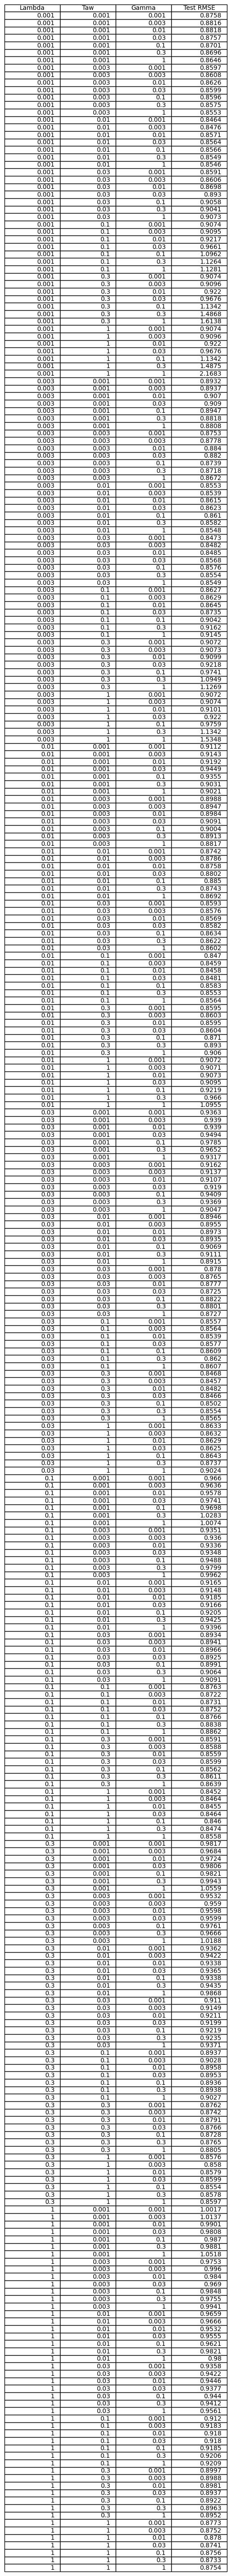

In [99]:
# Grid Search

columns = ["Lambda", "Taw", "Gamma", "Test RMSE"]
rows = []
min_rmse = 10
best_params = []
tic = time.time()
for lamda in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
    for taw in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
        for gamma in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
            _, _, _, _, _, _, _, test_rmses = als(my_ds, lamda=lamda, taw=taw, gamma=gamma, num_factors=10, iters=10)
            if test_rmses[-1] < min_rmse:
                min_rmse = test_rmses[-1]
                best_params = [lamda, taw, gamma]
            print('lamda =', lamda, 'taw =', taw, 'gamma =', gamma, 'Test RMSE =', round(test_rmses[-1], 4))
            rows.append([lamda, taw, gamma, round(test_rmses[-1], 4)])

toc = time.time()
print(f'Total Time: {(toc - tic) / 60:.2f} mins')
print('Best parameters were found to be', best_params, 'with Test RMSE =', min_rmse)

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=rows, colLabels=columns, loc='center')
plt.savefig("grid_search2.svg", dpi=300, bbox_inches='tight')
plt.show()


In [114]:
# Trying different values for number of latent factors

test_rmses_with_k = []
rmses_with_k = []
total_time = 0
tic = time.time()
for k in [1, 2, 4, 8, 16, 32, 64]:
    U, V, user_bias, movie_bias, losses, test_losses, rmses, test_rmses = als(my_ds, num_factors=k, iters=10)
    test_rmses_with_k.append(test_rmses[-1])
    rmses_with_k.append(rmses[-1])
    print(f'K = {k}, \t Duration = {(time.time() - tic) / 60:.2f} mins \t Train RMSE = {rmses[-1]:.4f} \t Test RMSE = {test_rmses[-1]:.4f}')
    total_time += time.time() - tic
    tic = time.time()

print(f'Total Time: {total_time / 60:.2f} mins')

# plt.plot(test_rmses_with_k)
# plt.show()
print('Train RMSEs =', rmses_with_k)
print('Test RMSEs =', test_rmses_with_k)

K = 1, 	 Duration = 1.06 mins 	 Train RMSE = 0.8103 	 Test RMSE = 0.8252
K = 2, 	 Duration = 1.59 mins 	 Train RMSE = 0.7929 	 Test RMSE = 0.8135
K = 4, 	 Duration = 1.87 mins 	 Train RMSE = 0.7677 	 Test RMSE = 0.7989
K = 8, 	 Duration = 2.47 mins 	 Train RMSE = 0.7296 	 Test RMSE = 0.7801
K = 16, 	 Duration = 4.13 mins 	 Train RMSE = 0.6862 	 Test RMSE = 0.7726
K = 32, 	 Duration = 6.44 mins 	 Train RMSE = 0.6324 	 Test RMSE = 0.7834
K = 64, 	 Duration = 13.85 mins 	 Train RMSE = 0.5601 	 Test RMSE = 0.8134
Total Time: 31.41 mins
Train RMSEs = [0.8103228142414081, 0.7929132823315447, 0.7677145932744608, 0.7296340107794855, 0.6862150800360283, 0.6324328865451848, 0.5600995330595535]
Test RMSEs = [0.8252151920778182, 0.8135144762346206, 0.7988850397520282, 0.7800625545720117, 0.7725976047086203, 0.783433082677633, 0.8134492451471119]


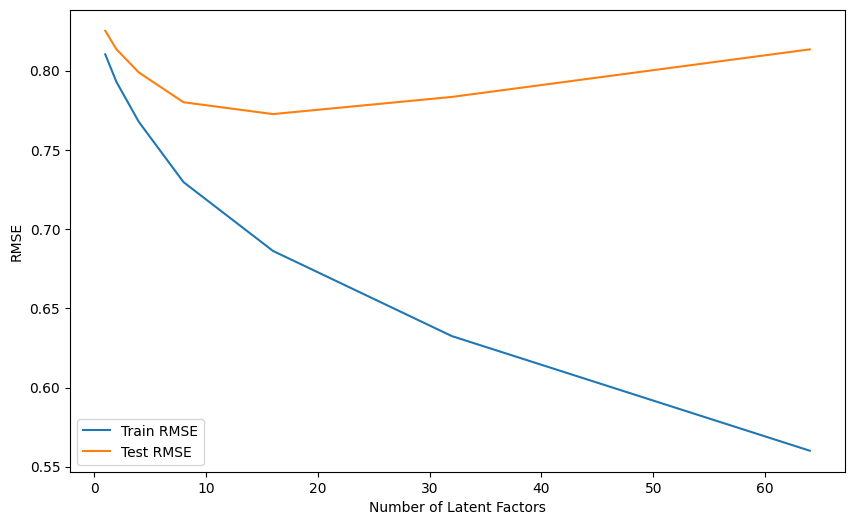

In [116]:
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 4, 8, 16, 32, 64], rmses_with_k, label="Train RMSE")
plt.plot([1, 2, 4, 8, 16, 32, 64], test_rmses_with_k, label="Test RMSE")
plt.legend()
plt.xlabel("Number of Latent Factors")
plt.ylabel("RMSE")
plt.savefig("varying_factors.svg")
plt.show()

In [21]:
xx = np.random.rand()
print(xx)

0.890726312594124


In [35]:
# Random Serach

# columns = ["Lambda", "Taw", "Gamma", "Test RMSE"]
# rows = []
min_rmse = 10
best_params = []
low, high = 0.001, 10
tic = time.time()
# for lamda in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
#     for taw in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
#         for gamma in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
for iter in range(200):
    lamda = np.exp(np.random.uniform(np.log(low), np.log(high)))
    taw = np.exp(np.random.uniform(np.log(low), np.log(high)))
    gamma = np.exp(np.random.uniform(np.log(low), np.log(high)))
    _, _, _, _, _, _, rmses, test_rmses = als(my_ds, lamda=lamda, taw=taw, gamma=gamma, num_factors=8, iters=10)
    if test_rmses[-1] < min_rmse:
        min_rmse = test_rmses[-1]
        best_params = [lamda, taw, gamma]
    print(f'Iter: [{iter + 1}/200], lamda = {lamda:.4f}, taw = {taw:.4f}, gamma = {gamma:.4f}, Train RMSE = {rmses[-1]:.4f}, Test RMSE = {test_rmses[-1]:.4f} \t Best Params = {best_params[0]:.4f}, {best_params[1]:.4f}, {best_params[2]:.4f},  Best Test RMSE = {min_rmse:.4f}')
    # rows.append([lamda, taw, gamma, round(test_rmses[-1], 4)])

toc = time.time()
print(f'Total Time: {(toc - tic) / 60:.2f} mins')
print('Best parameters were found to be', best_params, 'with Test RMSE =', min_rmse)

# fig, ax = plt.subplots()
# ax.axis('tight')
# ax.axis('off')
# table = ax.table(cellText=rows, colLabels=columns, loc='center')
# plt.savefig("grid_search2.svg", dpi=300, bbox_inches='tight')
# plt.show()


Iter: [1/200], lamda = 0.0066, taw = 0.0478, gamma = 3.5057, Train RMSE = 0.7926, Test RMSE = 0.8538 	 Best Params = 0.0066, 0.0478, 3.5057,  Best Test RMSE = 0.8538
Iter: [2/200], lamda = 7.9437, taw = 1.4469, gamma = 0.0034, Train RMSE = 0.7688, Test RMSE = 0.8933 	 Best Params = 0.0066, 0.0478, 3.5057,  Best Test RMSE = 0.8538
Iter: [3/200], lamda = 0.2354, taw = 0.5414, gamma = 3.3560, Train RMSE = 0.7815, Test RMSE = 0.8654 	 Best Params = 0.0066, 0.0478, 3.5057,  Best Test RMSE = 0.8538
Iter: [4/200], lamda = 0.4842, taw = 0.0286, gamma = 4.0516, Train RMSE = 0.7833, Test RMSE = 0.9355 	 Best Params = 0.0066, 0.0478, 3.5057,  Best Test RMSE = 0.8538
Iter: [5/200], lamda = 0.0055, taw = 0.0340, gamma = 0.0015, Train RMSE = 0.7794, Test RMSE = 0.8509 	 Best Params = 0.0055, 0.0340, 0.0015,  Best Test RMSE = 0.8509
Iter: [6/200], lamda = 0.0048, taw = 0.0569, gamma = 3.5316, Train RMSE = 0.8120, Test RMSE = 0.8638 	 Best Params = 0.0055, 0.0340, 0.0015,  Best Test RMSE = 0.8509
Iter

In [36]:
# Random Serach

# columns = ["Lambda", "Taw", "Gamma", "Test RMSE"]
# rows = []
min_rmse = 10
best_params = []
low, high = 0.001, 10
tic = time.time()
# for lamda in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
#     for taw in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
#         for gamma in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:
for iter in range(200):
    lamda = np.exp(np.random.uniform(np.log(low), np.log(high)))
    taw = np.exp(np.random.uniform(np.log(0.1), np.log(100)))
    gamma = np.exp(np.random.uniform(np.log(low), np.log(high)))
    _, _, _, _, _, _, rmses, test_rmses = als(my_ds, lamda=lamda, taw=taw, gamma=gamma, num_factors=8, iters=10)
    if test_rmses[-1] < min_rmse:
        min_rmse = test_rmses[-1]
        best_params = [lamda, taw, gamma]
    print(f'Iter: [{iter + 1}/200], lamda = {lamda:.4f}, taw = {taw:.4f}, gamma = {gamma:.4f}, Train RMSE = {rmses[-1]:.4f}, Test RMSE = {test_rmses[-1]:.4f} \t Best Params = {best_params[0]:.4f}, {best_params[1]:.4f}, {best_params[2]:.4f},  Best Test RMSE = {min_rmse:.4f}')
    # rows.append([lamda, taw, gamma, round(test_rmses[-1], 4)])

toc = time.time()
print(f'Total Time: {(toc - tic) / 60:.2f} mins')
print('Best parameters were found to be', best_params, 'with Test RMSE =', min_rmse)

# fig, ax = plt.subplots()
# ax.axis('tight')
# ax.axis('off')
# table = ax.table(cellText=rows, colLabels=columns, loc='center')
# plt.savefig("grid_search2.svg", dpi=300, bbox_inches='tight')
# plt.show()


Iter: [1/200], lamda = 0.2004, taw = 0.6111, gamma = 0.0035, Train RMSE = 0.7712, Test RMSE = 0.8560 	 Best Params = 0.2004, 0.6111, 0.0035,  Best Test RMSE = 0.8560
Iter: [2/200], lamda = 0.2153, taw = 29.2042, gamma = 0.2643, Train RMSE = 0.8977, Test RMSE = 0.9101 	 Best Params = 0.2004, 0.6111, 0.0035,  Best Test RMSE = 0.8560
Iter: [3/200], lamda = 0.0163, taw = 51.0059, gamma = 4.2703, Train RMSE = 1.4245, Test RMSE = 1.4282 	 Best Params = 0.2004, 0.6111, 0.0035,  Best Test RMSE = 0.8560
Iter: [4/200], lamda = 0.0028, taw = 80.2301, gamma = 0.5905, Train RMSE = 1.3417, Test RMSE = 1.3459 	 Best Params = 0.2004, 0.6111, 0.0035,  Best Test RMSE = 0.8560
Iter: [5/200], lamda = 7.2025, taw = 0.5265, gamma = 4.1734, Train RMSE = 0.7678, Test RMSE = 0.9005 	 Best Params = 0.2004, 0.6111, 0.0035,  Best Test RMSE = 0.8560
Iter: [6/200], lamda = 0.0125, taw = 5.5317, gamma = 0.0012, Train RMSE = 0.8970, Test RMSE = 0.9098 	 Best Params = 0.2004, 0.6111, 0.0035,  Best Test RMSE = 0.8560
I

In [56]:
print(losses)

[998861.5152231052, 845071.6717023506, 791275.7890405621, 767476.4585750847, 755041.840993127, 747843.4775124276, 743310.7339241533, 740260.9838777598, 738106.6269569814, 736526.7874044277, 735331.1672740647, 734400.5043322706, 733657.4966104751, 733050.9986438347, 732546.6981307874, 732121.2559781439, 731758.4644752761, 731446.6959784743, 731177.2400423525, 730943.2663827938]


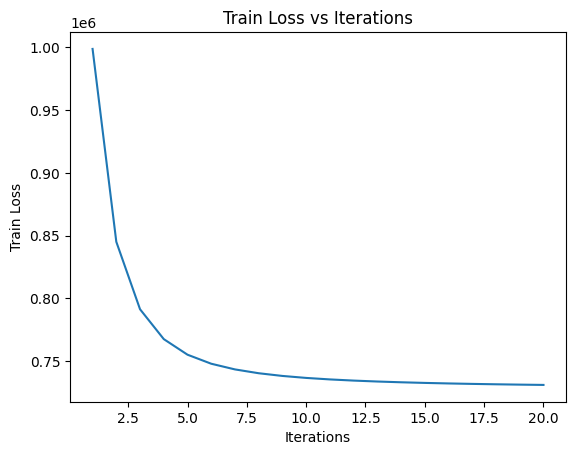

In [58]:
import matplotlib.pyplot as plt
# plt.plot(range(0, len(losses)), losses[:])
plt.plot(range(1, len(losses) + 1), losses[:])
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.title('Train Loss vs Iterations')
plt.savefig('losses_embeds.svg')
plt.show()

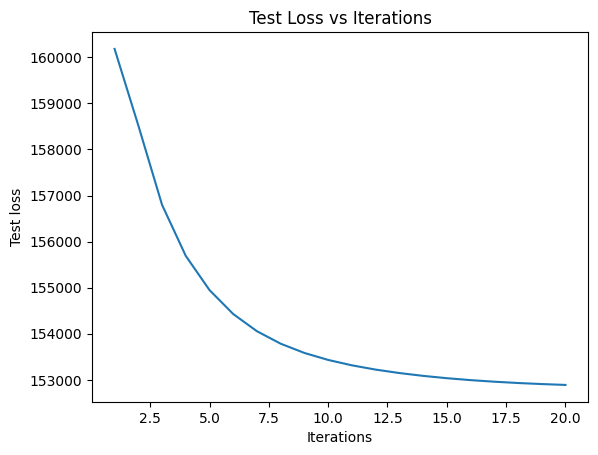

In [59]:
# plt.plot(range(len(test_losses)), test_losses)
plt.plot(range(1, len(test_losses) + 1), test_losses[:])
plt.xlabel('Iterations')
plt.ylabel('Test loss')
plt.title('Test Loss vs Iterations')
plt.savefig('test_losses_embeds.svg')
plt.show()

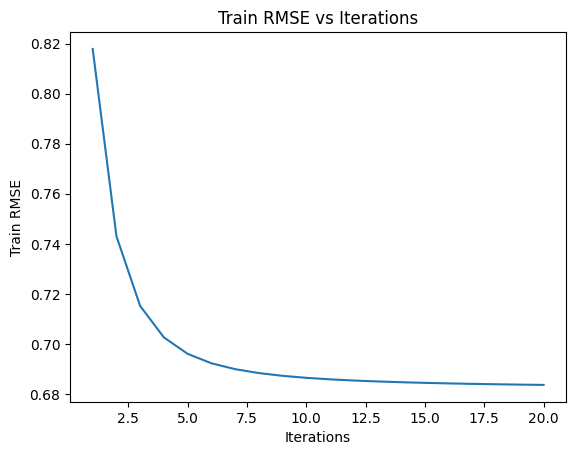

In [60]:
# plt.plot(range(len(rmses)), rmses)
plt.plot(range(1, len(rmses) + 1), rmses[:])
plt.xlabel('Iterations')
plt.ylabel('Train RMSE')
plt.title('Train RMSE vs Iterations')
plt.savefig('train_rmses_embeds.svg')
plt.show()

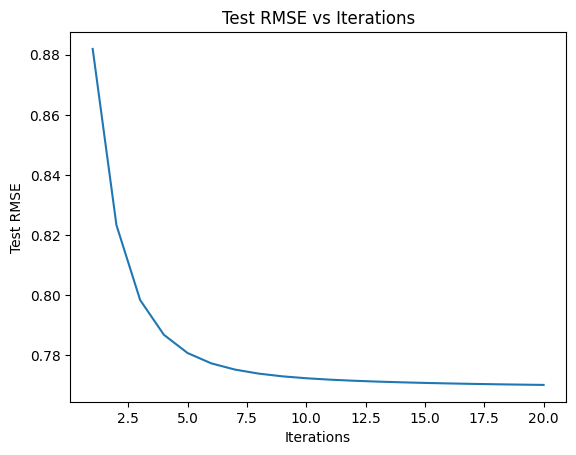

In [61]:
# plt.plot(range(len(test_rmses)), test_rmses)
plt.plot(range(1, len(test_rmses) + 1), test_rmses[:])

plt.xlabel('Iterations')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs Iterations')
plt.savefig('test_rmses_embeds.svg')
plt.show()

In [ ]:
print(V.max())

1.97994452674258


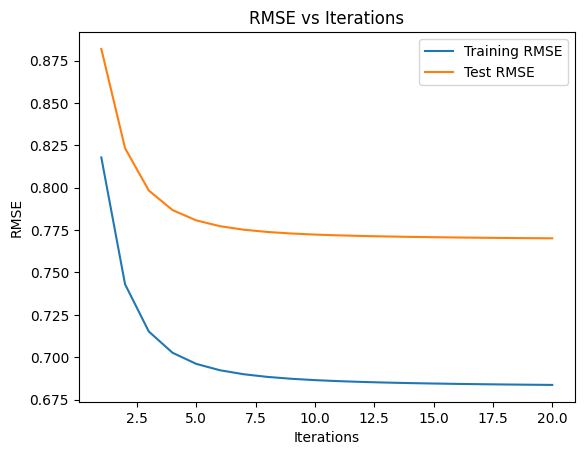

In [62]:
plt.plot(range(1, len(rmses) + 1), rmses, label = 'Training RMSE')
plt.plot(range(1, len(test_rmses) + 1), test_rmses, label = 'Test RMSE')
# plt.plot(range(1, len(rmses)), rmses[1:], label = 'Training RMSE')
# plt.plot(range(1, len(test_rmses)), test_rmses[1:], label = 'Test RMSE')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('RMSE vs Iterations')
plt.savefig('rmses_embeds.svg')
plt.show()